# TCII 

### Destefano, Martin 

## Trabajo semanal 1 (Ejercicio N°7 TP1) 


Se realizara el analisis del siguiente circuito, el cual representa un Filtro Pasa Todo o Rotador de fase: 

    
![Circuit](.\circuito1.png)

### Transferencia del circuito 

$$
(Ec.1)\\ 
(V_{b}-V_{1})*sC = \frac{-V_{b}}{R_{3}}\\ 
(Ec.2)\\ 
\frac{V_{a} - V_{1}}{R_{1}} = \frac{V_{2} - V_{a}}{R_{2}}\\ 
(Ec.3)\\ 
V_{a} = V_{b} 
$$

De Ec. 1: 

$$
    V_{b}(sC+\frac{1}{R_{3}} = V_{1}sC \, (Ec. 1.1) \\ 
     \\V_{b} = \frac{V_{1}sCR_{3}}{R_{3}sC+1} \, (Ec. 1.2) \\ 
$$

De Ec. 2: 

$$ 
    V_{a}(\frac{1}{R_{1}}+\frac{1}{R_{2}})=\frac{V_{2}}{R_{2}}+\frac{V_{1}}{R_{1}} \, (Ec. 2.1) \\ 
    V_{a} = \frac{R_{1}V_{2}+R_{2}V_{1}}{R_{2}+R_{1}} \, (Ec 2.2) \\ 
$$

Combinando Ec. 1.2, Ec 2.2 y Ec. 3: 

$$
    \frac{V_{1}sCR_{3}}{R_{3}sC+1} = \frac{R_{1}V_{2}+R_{2}V_{2}}{R_{2}+R_{1}} \, (Ec. 3.1) \\ 
    V_{1}(\frac{V_{1}sCR_{3}}{R_{3}sC+1} - \frac{R_{2}}{R_{2}+R_{1}}) = \frac{R_{1}V_{2}}{R_{2}+R_{1}} \, (Ec. 3.2) \\
    V_{1}\frac{sCR_{3}R_{1}-R_{2}}{R_{3}sC+1} = V_{2}R_{1} \, (Ec. 3.3) \\
    T(s) = \frac{V_{2}}{V_{1}} = \frac{sCR_{3}R_{1}-R_{2}}{sCR_{3}R_{1}+R_{1}} = \frac{s-\frac{R_{2}}{R_{3}R_{1}C}}{s+\frac{1}{R_{3}C}}  V_{2}R_{1} \, (Ec. 3.3) \\
$$

si: $\omega_{0} = \frac{1}{R_{3}C}$

$$     T(s) = \frac{s-\frac{R_{2}}{R_{1}}\omega_{0}}{s+\omega_{0}}
$$


<img src="phasemodule.jpg" alt="moduleandphase" style="width: 500px;"/>

<img src="pzero.png" alt="polesandzeros" style="width: 500px;"/>


[Desarrollo en papel](https://drive.google.com/file/d/1ZqM3OznQR7OZ5t3-oCqiNuwSzluNQwwP/view?usp=sharing)

### Verificacion de los resultados en Python 

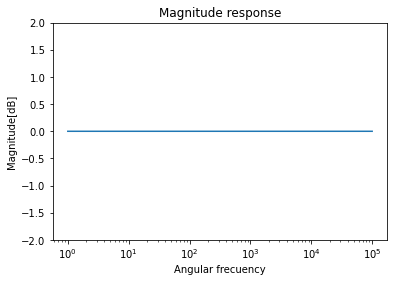

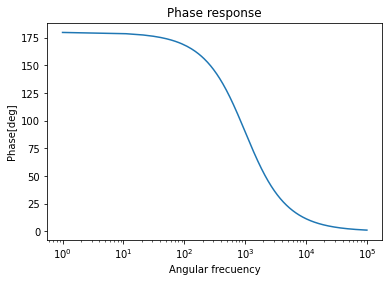

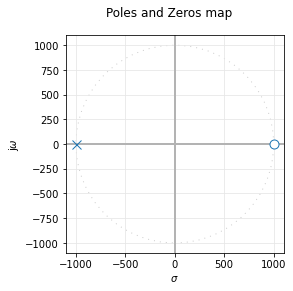

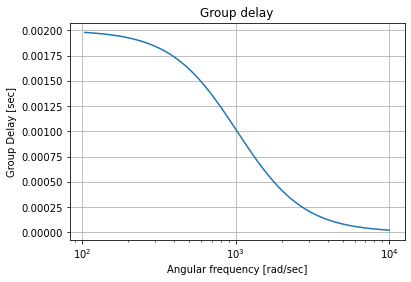

In [1]:
from scipy import signal
import matplotlib.pyplot as plt
from splane import bodePlot, pzmap, grpDelay
import numpy as np

R=1000
C=0.000001


wo=np.arange(1, 10**5, 10)
sys = signal.TransferFunction([1,-1/(R*C)], [1,1/(R*C)])
w, mag, phase = signal.bode(sys,wo)

plt.figure()
plt.ylim(-2,2)
plt.title('Magnitude response')
plt.xlabel('Angular frecuency')
plt.ylabel('Magnitude[dB]')
plt.semilogx(w, mag)    # Diagrama de bode en magnitud

plt.figure()
plt.title('Phase response')
plt.xlabel('Angular frecuency')
plt.ylabel('Phase[deg]')
plt.semilogx(w, phase)  # Diagrama de bode en fase

pzmap(sys)              # Diagrama de Polos y Ceros
grpDelay(sys)
plt.show()

### Funcion de transferencia normalizada 

Con la siguiente norma de frecuencia $\Omega_{w} = \omega_{0}$ y si consideramos $\frac{R2}{R1} = 1$: 
$$ $=\frac{S}{\omega_{0}} $$ 

$$ T(S)=\frac{$-1}{$+1} $$ 

Utilizamos $ \omega_{0} $ como norma de frecuencia ya que con la variacion de solo este parametro podemos modificar el desdoblamiento de fase. 


A continuacion propongo una red normalizada teniendo como norma de impedancia es $\Omega_{z} = R_{3}$

<img src="normRed.png" alt="Red normalizada" style="width: 600px;"/>

### Modulo y fase 

A continuacion calcularemos el modulo de la funcion: 

$$ |T(jw)| = \frac {\sqrt{\omega^2 + (\frac{R_{1}}{R_{2}})^2 \omega_{0}^2}}{\sqrt{\omega^2+\omega_{0}^2}} $$

Si suponemos R1 = R2, la transferencia nos remite a un pasatodo, con modulo 1 para cualquier frecuencia. 

$|T(j\omega)| = 1$ 

De no ser asi, nos queda: 

$|T(j\omega)|_{\omega=0} = \frac{R_{2}}{R_{1}}$ 

$|T(j\omega)|_{\omega=\omega_{0}} = 1 $

$|T(j\omega)|_{\omega\rightarrow\infty} \rightarrow \infty $ 

Para la fase, evaluo el diagrama de polos y ceros, considerando que $ \frac{R1}{R2} = 1 $: 

$\phi_{\omega=0} = \pi $

$\phi_{\omega=\omega_{0}} = \frac{\pi}{2} $

$\phi_{\omega\rightarrow\infty} = 0 $

### Simulacion con Python de la funcion normalizada

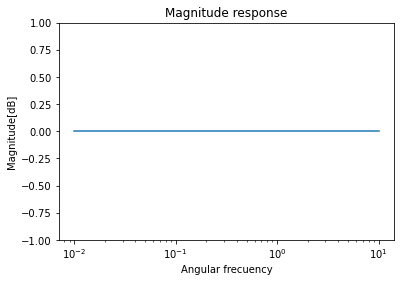

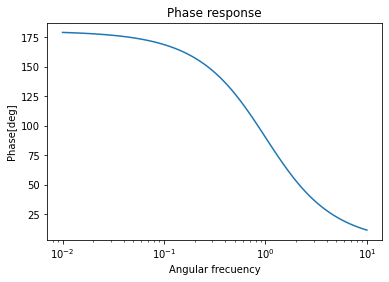

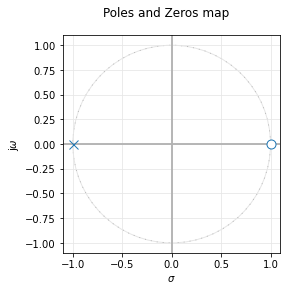

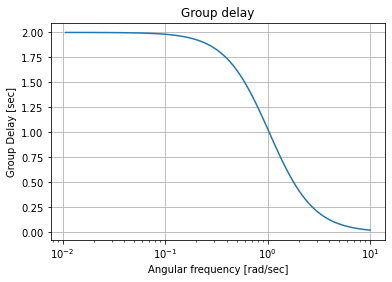

In [2]:
from splane import pzmap, grpDelay 
from scipy import signal
import matplotlib.pyplot as plt
my_tf = signal.TransferFunction([1,-1], [1, 1])
w, mag, phase = signal.bode(my_tf)
plt.figure()
plt.ylim(-1,1)
plt.title('Magnitude response')
plt.xlabel('Angular frecuency')
plt.ylabel('Magnitude[dB]')
plt.semilogx(w, mag)    # Modulo
plt.figure()
plt.title('Phase response')
plt.xlabel('Angular frecuency')
plt.ylabel('Phase[deg]')
plt.semilogx(w, phase)  # Fase
pzmap(my_tf)            # Polos y zeros 
grpDelay(my_tf)         # Retardo de grupo 
plt.show()
plt.close('all')


## Simulacion del circuito con LTSpice

A continuacion realizamos la simulacion en frecuencia del circuito mediante el software LTSpice. Para la simulacion consideraremos $\frac{R_{2}}{R_{1}} = 1$, $ R_{3}=1K\Omega $ $ C=1{\mu}F $

![CircuitLTS](.\CircuitoLTS.png)

![Graph](.\Graph1.png)

Como podemos observar la el modulo es aproximadamente 0dB para un amplio espectro de frecuencias, caracteristica que identifica el filtro pasa todo. 

### Conclusiones
Calculamos la transferencia del filtro, como tambien su normalizacion. Ademas pudimos observar el mismo resultado que obtuvimos analiticamente mediante la simulacion de Python y LTSpice. 

El filtro pasatodo cobra importancia cuando debemos trabajar con la fase, esta presente en multiples aplicaciones dentro de las comunicaciones ya que es un corrector de fase con versatilidad. Se utiliza tanto en señales discretas como continuas. 